1. To create the requested reports and analyze the dataset, we'll first need to import the data and perform some data processing using Python. We'll use the Pandas library for data manipulation and Matplotlib for data visualization.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset into a Pandas DataFrame
data = pd.read_excel('/content/Omnify-Analyst-Intership-Task.xlsx')

In [5]:
# Now we will perform some data processing
data.columns

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country'],
      dtype='object')

In [7]:
data.dtypes

Week              datetime64[ns]
Campaign                  object
Ad group                  object
Keyword type              object
Search Keyword            object
Currency                  object
Clicks                     int64
Impressions                int64
Cost ($)                 float64
Leads                      int64
Prospects                  int64
Payment ($)               object
Payment Date      datetime64[ns]
Country                   object
dtype: object

In [9]:
data.shape

(418, 14)

In [10]:
data.describe()

,Clicks,Impressions,Cost ($),Leads,Prospects
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.925837,16.662679,6.671483,0.028708,0.050239
std,1.900840,46.743636,14.253019,0.167185,0.285312
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,12.000000,6.800000,0.000000,0.000000
max,12.000000,357.000000,92.090000,1.000000,3.000000


In [13]:
data.isnull().sum()

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      6
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64

In [16]:
# Check data types and unique values in 'Payment ($)' and 'Cost ($)' columns
print(data['Payment ($)'].dtype)
print(data['Payment ($)'].unique())


object
['$980' 0 '$1,188' '$1,788' '$2,388']


In [17]:
print(data['Cost ($)'].dtype)
print(data['Cost ($)'].unique())

float64
[38.33 11.7  45.13 23.91  4.89  4.93 13.44  6.08  6.38  0.   17.43 32.1
 13.63 22.14 12.27 28.47 22.61 12.49  3.73  6.37 15.11  6.23 12.05 29.87
 42.5  32.15 40.21  1.52 11.33 11.47  4.56  5.03 14.46 10.98 44.41 15.97
 92.09 25.33 16.   11.59 17.34 10.35  2.22 63.94 39.76 17.04  8.69 15.32
 10.85  4.64 13.33 10.5   6.83 42.26 16.96 25.75 30.32  5.25  9.46 11.4
 45.5  52.09 52.37 31.04  9.43 13.08  1.74  5.36 18.38  9.44  8.96 10.81
 86.79 22.7  21.27 11.15  6.61 11.32 10.62  6.95  3.61  3.34 50.15 13.25
 84.27 46.89 15.41  7.89 19.15 15.43 14.9   5.21 11.17 11.1  13.91 30.2
  5.97 46.52 32.76 11.37  7.09  4.62 10.66  4.5   3.65  4.97  5.34  4.46
 89.95  6.27 10.14 33.33  6.82  3.82 23.96  2.67 10.57 19.64 71.38 19.81
  4.54  0.71  0.74  3.42  6.4  29.65  3.98 15.85  1.93  9.67 10.08  3.12
  4.25  3.32  2.11 10.42 32.79  1.83 21.84 18.33  1.25 16.8  65.66 53.69
 11.73 39.16 23.06  6.74  1.92  4.41  0.93  7.58  6.15  4.57  3.77]


In [18]:
# Remove currency symbols and convert to numeric type
data['Payment ($)'] = data['Payment ($)'].replace('[\$,]', '', regex=True).astype(float)
data['Cost ($)'] = data['Cost ($)'].replace('[\$,]', '', regex=True).astype(float)


In [19]:
# Convert 'Payment Date' column to datetime format
data['Payment Date'] = pd.to_datetime(data['Payment Date'])

# Handle missing or invalid values by filling them with 0
data['Payment ($)'] = data['Payment ($)'].fillna(0)
data['Cost ($)'] = data['Cost ($)'].fillna(0)

# Calculate Returns Percentage (Returns on Ad Spends)
data['Returns %'] = (data['Payment ($)'] / data['Cost ($)']) * 100

# Extract the week and month from the 'Payment Date' column
data['Week'] = data['Payment Date'].dt.strftime('%U')
data['Month'] = data['Payment Date'].dt.strftime('%Y-%m')


In [28]:
# Group by week and month and calculate key metrics
weekly_report = data.groupby('Week').agg({
    'Cost ($)': 'sum',
    'Payment ($)': 'sum',
    'Returns %': 'mean',
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum'
}).reset_index()

monthly_report = data.groupby('Month').agg({
    'Cost ($)': 'sum',
    'Payment ($)': 'sum',
    'Returns %': 'mean',
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum'
}).reset_index()

print(weekly_report)

  Week  Cost ($)  Payment ($)     Returns %  Clicks  Impressions  Leads  \
0   05     38.33        980.0   2556.744065       2           17      0   
1   07     12.05        980.0   8132.780083       4           27      0   
2   09     15.97       1788.0  11195.992486       3           31      0   
3   10     45.13       1188.0   2632.395302       4          154      0   
4   13     50.15       2388.0   4761.714855      12           35      0   
5   17     61.90       3368.0   7238.918614       7          245      0   
6   18     65.66       1188.0   1809.320743       8          255      0   

   Prospects  
0          1  
1          1  
2          1  
3          1  
4          3  
5          2  
6          2  


In [26]:
# Most Profitable Channel based on highest average Returns %
most_profitable_channel = data.groupby('Campaign')['Returns %'].mean().idxmax()

print(most_profitable_channel)


EK_Generic_Tri-Tok_Reservation


In [27]:
# Most Profitable Category/Keyword based on highest average Returns %
most_profitable_category = data.groupby('Search Keyword')['Returns %'].mean().idxmax()

print(most_profitable_category)

reservation management system


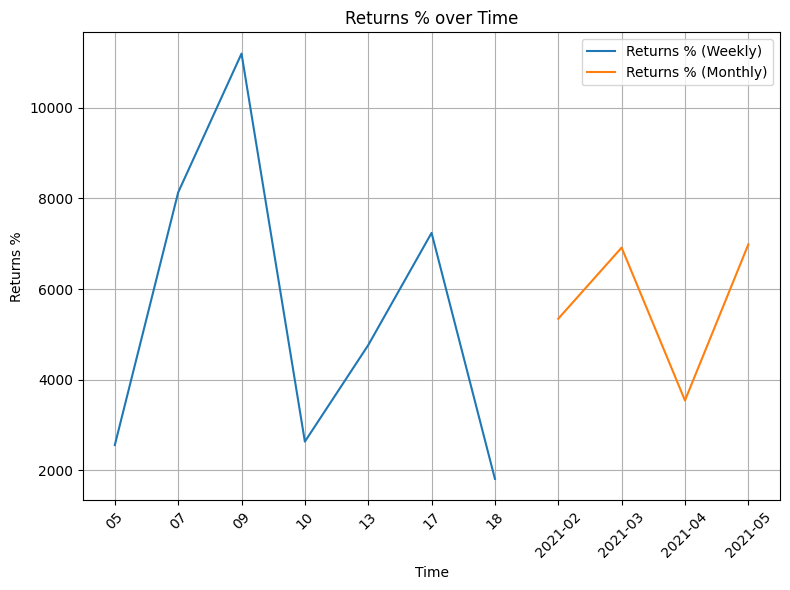

In [23]:
# Time Series Graph for Returns % over time (Weekly and Monthly)
plt.figure(figsize=(8, 6))
plt.plot(weekly_report['Week'], weekly_report['Returns %'], label='Returns % (Weekly)')
plt.plot(monthly_report['Month'], monthly_report['Returns %'], label='Returns % (Monthly)')
plt.xlabel('Time')
plt.ylabel('Returns %')
plt.title('Returns % over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time Series Graph for other metrics (e.g., Cost, Payment, Clicks, etc.) can be plotted similarly.


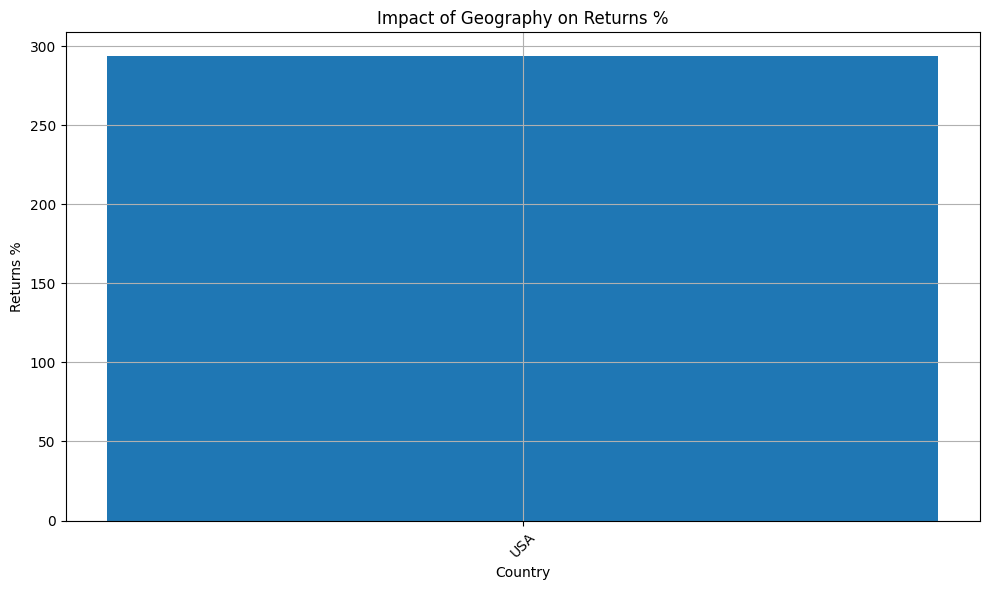

In [24]:
# Group by country and calculate key metrics
geo_report = data.groupby('Country').agg({
    'Cost ($)': 'sum',
    'Payment ($)': 'sum',
    'Returns %': 'mean',
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum'
}).reset_index()

# Bar plot to visualize the impact of geography on Returns %
plt.figure(figsize=(10, 6))
plt.bar(geo_report['Country'], geo_report['Returns %'])
plt.xlabel('Country')
plt.ylabel('Returns %')
plt.title('Impact of Geography on Returns %')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Similar bar plots for other metrics (e.g., Cost, Payment, Clicks, etc.) can be plotted.


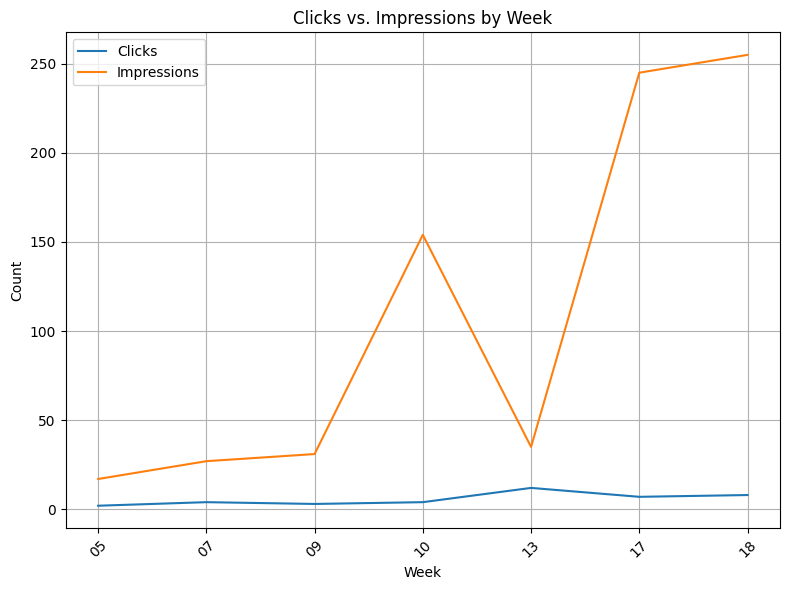

In [30]:
# Comparison of Clicks and Impressions by Week

plt.figure(figsize=(8, 6))
plt.plot(weekly_report['Week'], weekly_report['Clicks'], label='Clicks')
plt.plot(weekly_report['Week'], weekly_report['Impressions'], label='Impressions')
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Clicks vs. Impressions by Week')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


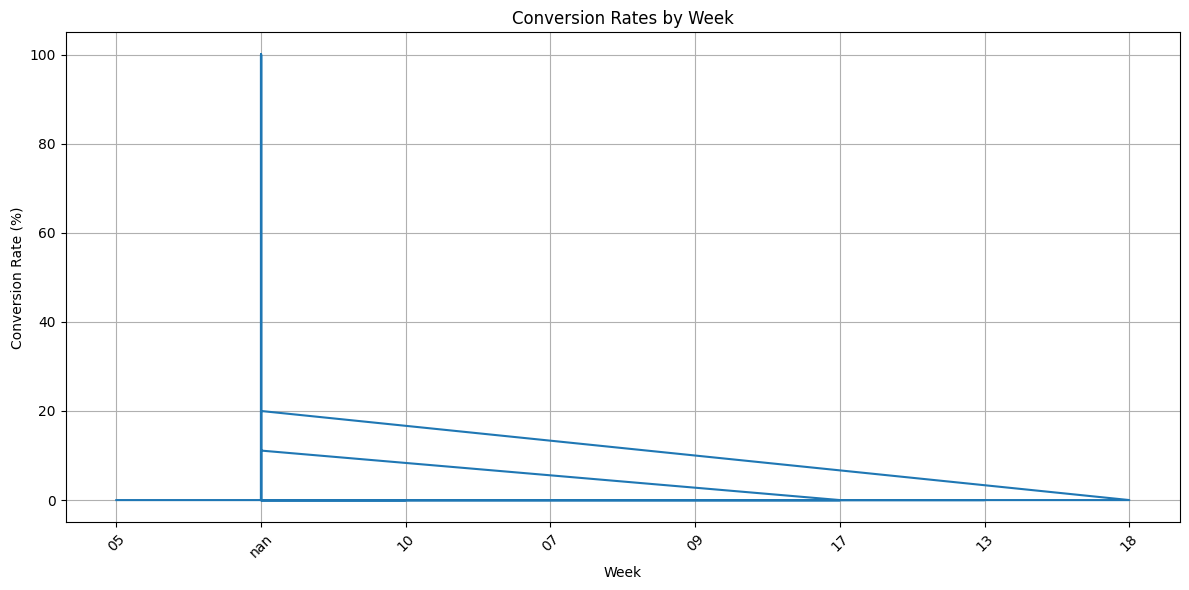

In [39]:
# Conversion Rates by Week
import numpy as np

# Calculate Conversion Rate and handle division by zero
data['Conversion Rate'] = (data['Leads'] / data['Clicks']) * 100
data['Conversion Rate'] = data['Conversion Rate'].replace([np.inf, -np.inf, np.nan], 0)

# Convert the 'Week' column to string format
data['Week'] = data['Week'].astype(str)

# Time Series Graph for Conversion Rate by Week
plt.figure(figsize=(12, 6))
plt.plot(data['Week'], data['Conversion Rate'])
plt.xlabel('Week')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rates by Week')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




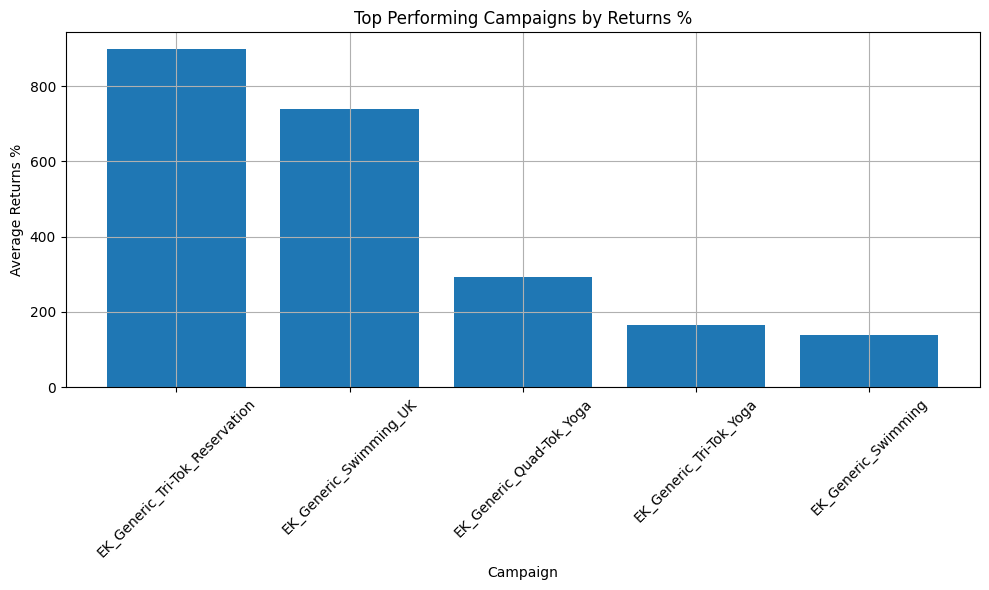

In [32]:
#Top Performing Campaigns by Returns %
top_campaigns = data.groupby('Campaign')['Returns %'].mean().nlargest(5)

plt.figure(figsize=(10, 6))
plt.bar(top_campaigns.index, top_campaigns.values)
plt.xlabel('Campaign')
plt.ylabel('Average Returns %')
plt.title('Top Performing Campaigns by Returns %')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


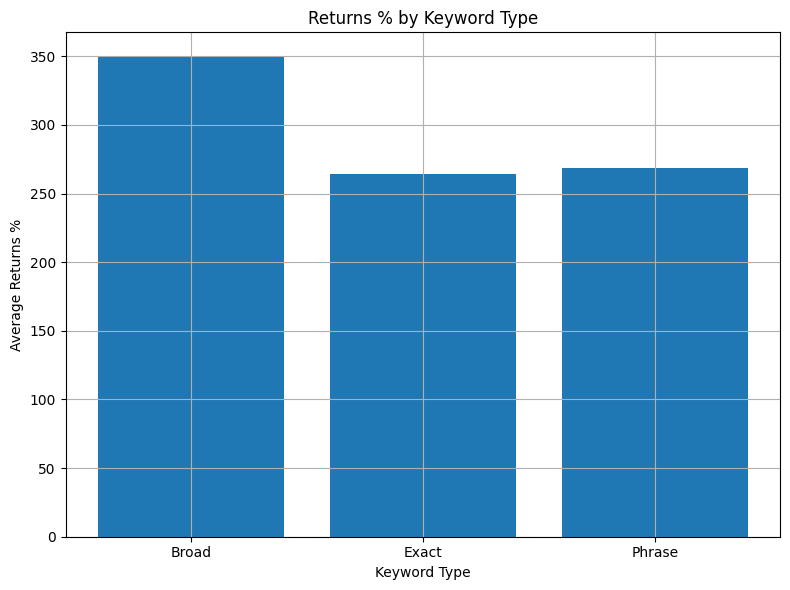

In [33]:
#Returns % by Keyword Type

returns_by_keyword_type = data.groupby('Keyword type')['Returns %'].mean()

plt.figure(figsize=(8, 6))
plt.bar(returns_by_keyword_type.index, returns_by_keyword_type.values)
plt.xlabel('Keyword Type')
plt.ylabel('Average Returns %')
plt.title('Returns % by Keyword Type')
plt.grid(True)
plt.tight_layout()
plt.show()

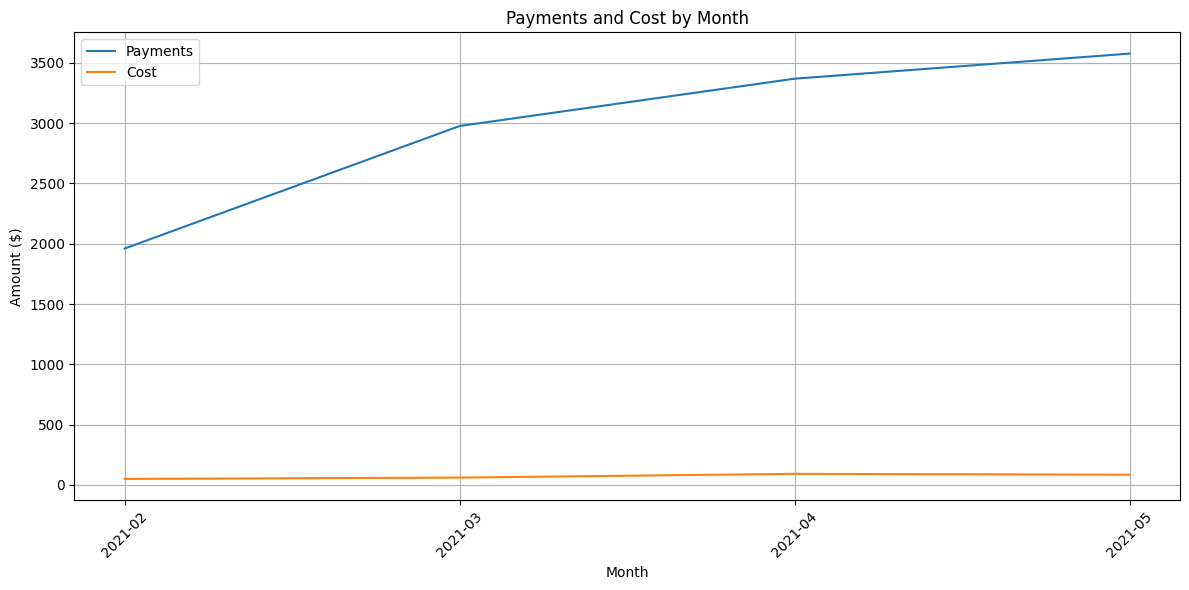

In [34]:
# Payments and Cost by Month
plt.figure(figsize=(12, 6))
plt.plot(monthly_report['Month'], monthly_report['Payment ($)'], label='Payments')
plt.plot(monthly_report['Month'], monthly_report['Cost ($)'], label='Cost')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Payments and Cost by Month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
